# Với ba điểm A(1.0, 3.33), B(2.0, 5.77), C(3.0, 7.35)

<img src="img/example.png"/>

In [1]:
x = [1.0, 2.0, 3.0]
y = [3.33, 5.77, 7.35]

In [2]:
def L(w, b):
    return 32.8 - 24.613*w - 10.96*b + (14/3)*w**2 + 4*w*b + b**2

def dLdw(w, b):
    return -24.613 + (28/3)*w + 4*b

def dLdb(w, b):
    return -10.96 + 4*w + 2*b

In [3]:
import matplotlib.pyplot as plt

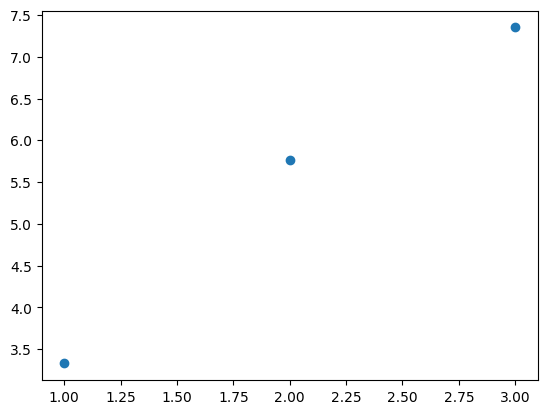

In [4]:
plt.scatter(x, y)

In [8]:
w0 = 0
b0 = 0

dw = dLdw(w0, b0)
db = dLdb(w0, b0)
L0 = L(w0, b0)

w_hist = [w0]
b_hist = [b0]
dw_hist = [dw]
db_hist = [db]
L_hist = [L0]

learning_rate = 0.1
tolerance = 1e-8

for i in range(1000):
    old_w = w_hist[-1]
    old_b = b_hist[-1]
    new_w = old_w - learning_rate * dw
    new_b = old_b - learning_rate * db

    dw = dLdw(new_w, new_b)
    db = dLdb(new_w, new_b)
    loss = L(new_w, new_b)

    w_hist.append(new_w)
    b_hist.append(new_b)
    dw_hist.append(dw)
    db_hist.append(db)
    L_hist.append(loss)

    if abs(dw) < tolerance and abs(db) < tolerance:
        break
        
    if i % 20 == 0:
        print(f"Step {i}: w = {w_hist[-1]}, b = {b_hist[-1]}, dw = {dw_hist[-1]}, db = {db_hist[-1]}")

Step 0: w = 2.4613, b = 1.096, dw = 2.7431333333333363, db = 1.0771999999999995
Step 20: w = 2.141804244292403, b = 1.1630420139129183, dw = 0.029341002380766312, db = -0.06669899500455312
Step 40: w = 2.094773852769575, b = 1.269953148322547, dw = 0.018035219139554748, db = -0.04099829227660701
Step 60: w = 2.065865385147169, b = 1.3356688901541947, dw = 0.011085821990355349, db = -0.025200679102935997
Step 80: w = 2.0480960348777786, b = 1.376062799996524, dw = 0.006814192178697276, db = -0.01549026049583846
Step 100: w = 2.0371736361840633, b = 1.400891979533602, dw = 0.004188522518999704, db = -0.009521496196543744
Step 120: w = 2.030459896434671, b = 1.416153888046316, dw = 0.002574585575526811, db = -0.005852638168684976
Step 140: w = 2.026333119644468, b = 1.4255350216879907, dw = 0.001582536766998821, db = -0.0035974780461480727
Step 160: w = 2.023796487705808, b = 1.4313013823190772, dw = 0.0009727478638517084, db = -0.002211284538613967
Step 180: w = 2.0222372801403536, b = 1

In [9]:
print(w_hist[-1], b_hist[-1], dw_hist[-1], db_hist[-1])

2.0197500181900554 1.4404999586497274 4.372760820103849e-09 -9.940324563473268e-09


In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

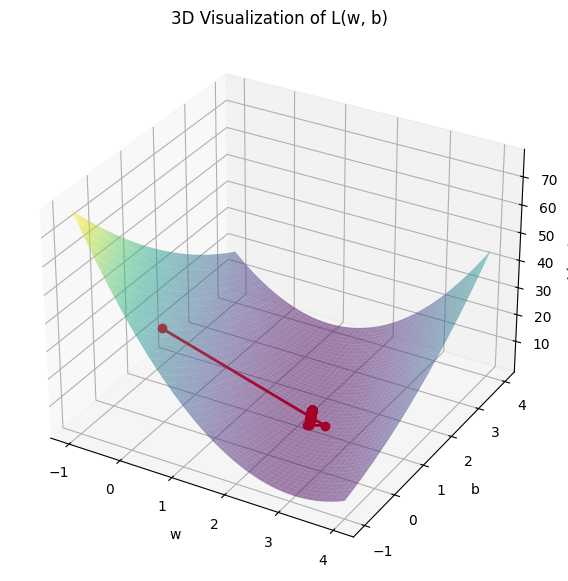

In [11]:
w = np.linspace(-1, 4, 500)
b = np.linspace(-1, 4, 500)

W, B = np.meshgrid(w, b)
L_values = L(W, B)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(w_hist, b_hist, L_hist, color='red', marker='o', markersize=6, linewidth=2, label="Gradient Descent Path")
ax.plot_surface(W, B, L_values, cmap='viridis', edgecolor='none', alpha=0.5)


ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("L(w, b)")
ax.set_title("3D Visualization of L(w, b)")

plt.show()